In [230]:
from PIL import Image, ImageChops
from PIL import ImageChops, ImageStat
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from PIL import ImageStat as stat

In [231]:
def wstaw_inicjaly(base_img, inserted_img, m, n, colour):
    base_tab = np.asarray(base_img).astype(np.uint8)
    inserted_tab = np.asarray(inserted_img).astype(np.uint8)
    
    base_h, base_w = base_tab.shape[:2]
    inserted_h, inserted_w = inserted_tab.shape[:2]
    
    tab = np.copy(base_tab)
    
    n_k = min(base_h, n + inserted_h)
    m_k = min(base_w, m + inserted_w)
    n_p = max(0, n)
    m_p = max(0, m)

    n_move = n_p - n
    m_move = m_p - m
    
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            if inserted_tab[i - n + n_move, j - m + m_move] == 0:
                tab[i, j] = colour
    
    return Image.fromarray(tab)

In [232]:
base_img = Image.open('obraz.png').convert('RGB')
inserted_img = Image.open('inicjaly.bmp').convert('1')

print(inserted_img.size)

(100, 50)


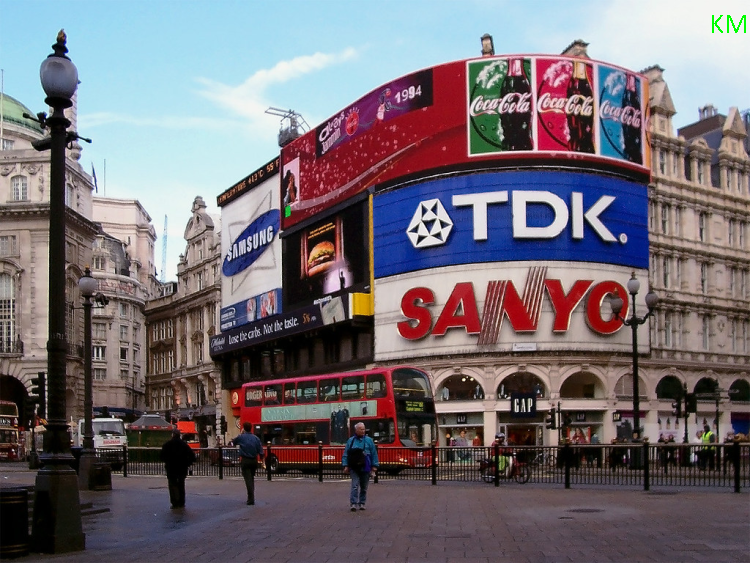

In [233]:
img1 = wstaw_inicjaly(base_img, inserted_img, m=680, n=0, colour=[0, 255, 0])
img1

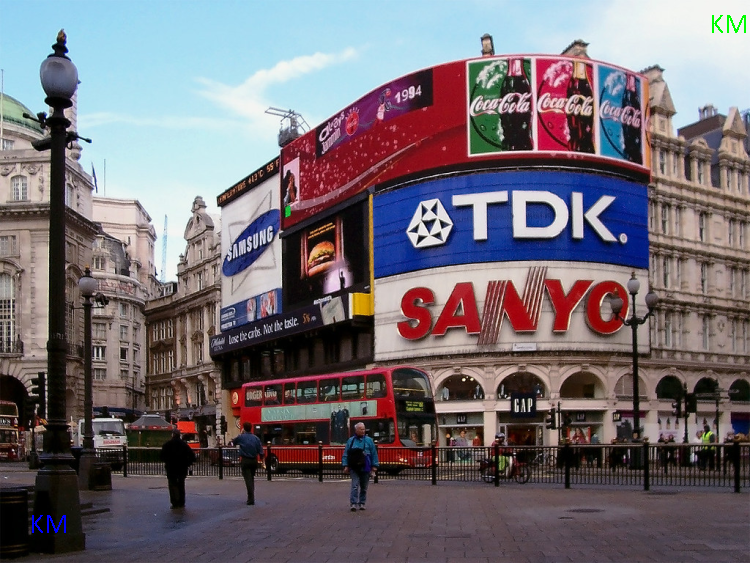

In [234]:
img2 = wstaw_inicjaly(img1, inserted_img, m=0, n=500, colour=[0, 0, 255])
img2

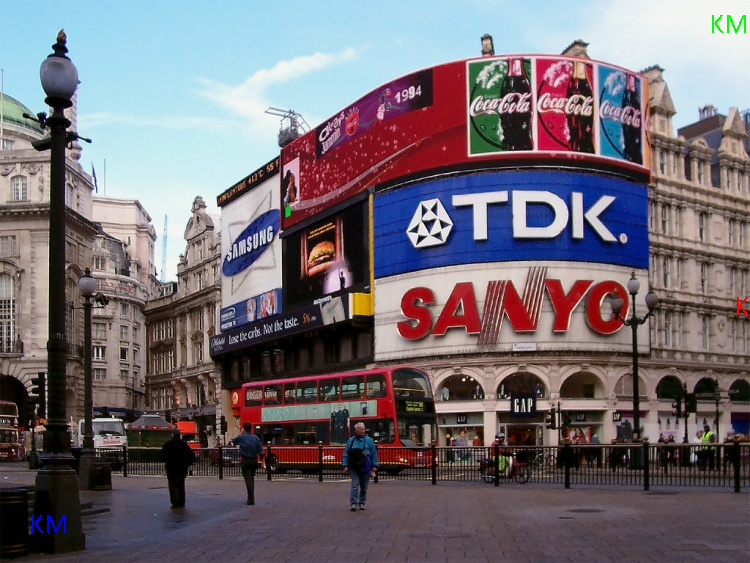

In [235]:
img3 = wstaw_inicjaly(img2, inserted_img, m=705, n=282, colour=[255, 0, 0])
img3

In [236]:
img3.save('obraz_inicjaly.png')

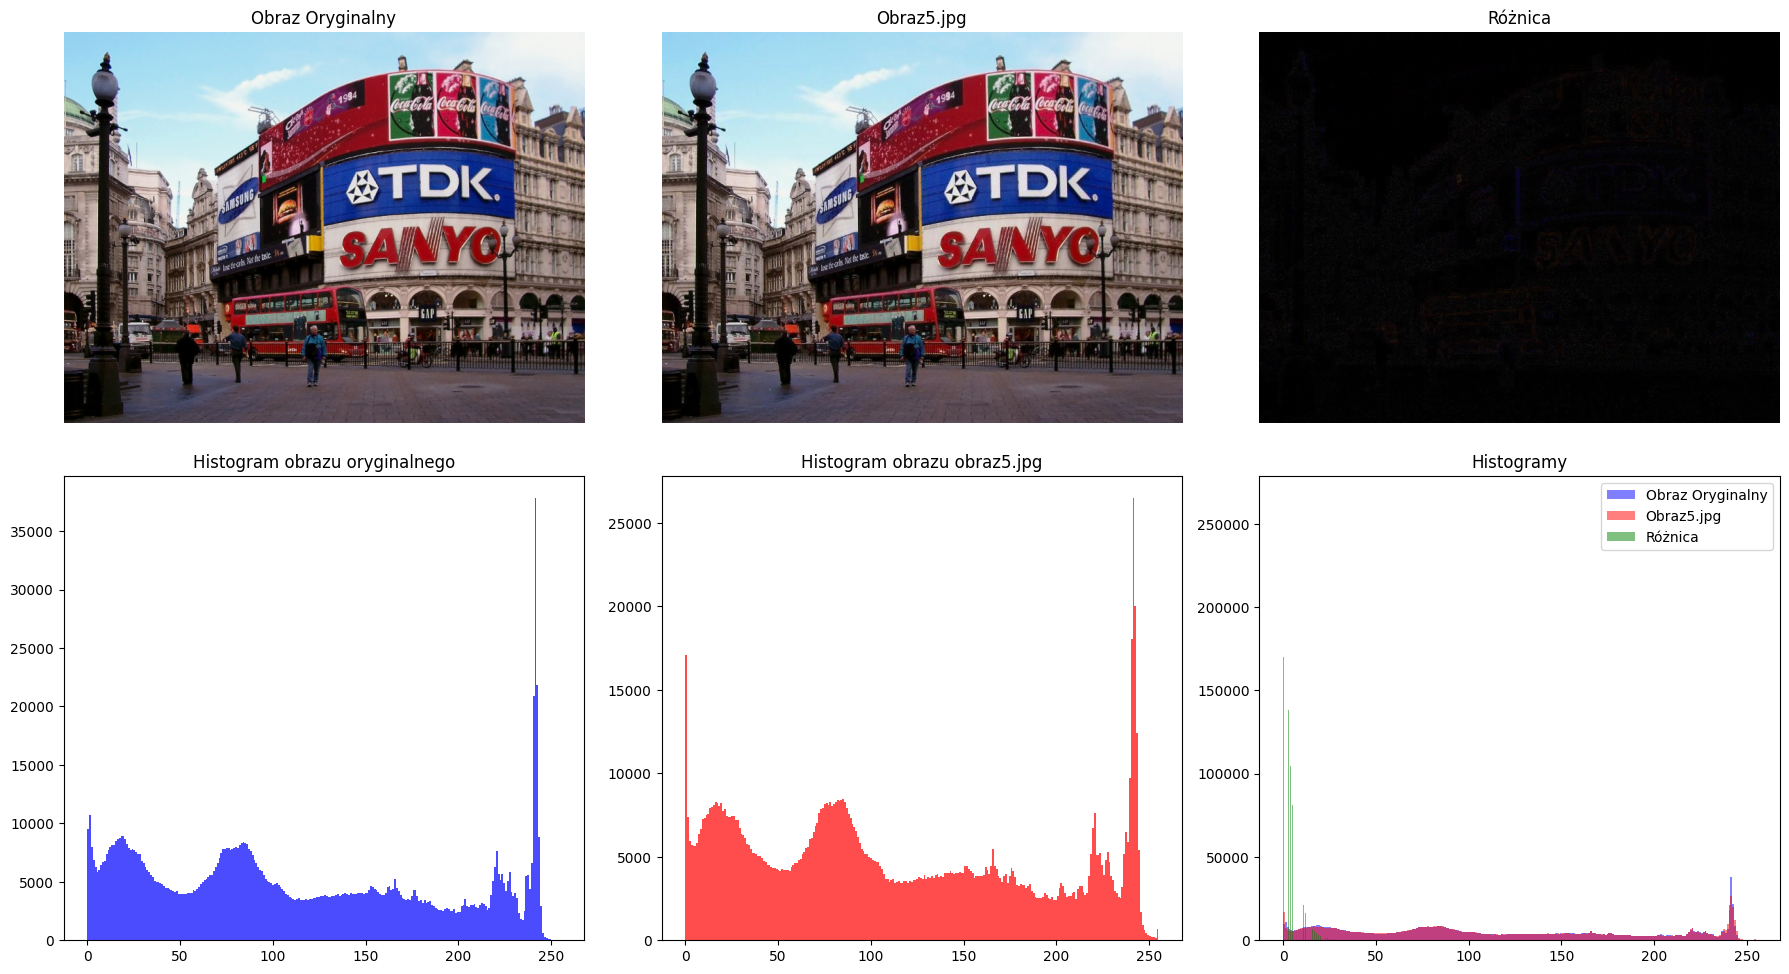

Statystyki obrazu oryginalnego:
0 255 113.34395184527334 76.83687735456333

Statystyki obrazu obraz5.jpg:
0 255 113.38544543122163 76.66054965818942

Statystyki różnicy:
0 71 3.9783461614367477 4.326841430822524


In [237]:
obraz = Image.open("obraz.png").convert("RGB")
for i in range(1, 6):
    if i == 1:
        current_image = obraz
    else:
        current_image = Image.open(f"obraz{i-1}.jpg").convert("RGB")
    current_image.save(f"obraz{i}.jpg")

obraz5 = Image.open("obraz5.jpg").convert("RGB")

difference = ImageChops.difference(obraz, obraz5)

obraz_array = np.asarray(obraz)
obraz5_array = np.asarray(obraz5)
difference_array = np.asarray(difference)

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

ax[0, 0].imshow(obraz)
ax[0, 0].set_title("Obraz Oryginalny")
ax[0, 0].axis('off')

ax[0, 1].imshow(obraz5)
ax[0, 1].set_title("Obraz5.jpg")
ax[0, 1].axis('off')

ax[0, 2].imshow(difference)
ax[0, 2].set_title("Różnica")
ax[0, 2].axis('off')

ax[1, 2].hist(obraz_array.flatten(), bins=256, color='blue', alpha=0.5, label='Obraz Oryginalny')
ax[1, 2].hist(obraz5_array.flatten(), bins=256, color='red', alpha=0.5, label='Obraz5.jpg')
ax[1, 2].hist(difference_array.flatten(), bins=256, color='green', alpha=0.5, label='Różnica')
ax[1, 2].set_title("Histogramy")
ax[1, 2].legend(loc='upper right')

# Histogram obrazu oryginalnego
ax[1, 0].hist(obraz_array.flatten(), bins=256, color='blue', alpha=0.7)
ax[1, 0].set_title("Histogram obrazu oryginalnego")

# Histogram obrazu obraz5.jpg
ax[1, 1].hist(obraz5_array.flatten(), bins=256, color='red', alpha=0.7)
ax[1, 1].set_title("Histogram obrazu obraz5.jpg")

plt.tight_layout()
plt.savefig('histogramy_i_obrazy.png')
plt.show()


print("Statystyki obrazu oryginalnego:")
print(np.min(obraz_array), 
      np.max(obraz_array), 
      np.mean(obraz_array), 
      np.std(obraz_array))

print("\nStatystyki obrazu obraz5.jpg:")
print(np.min(obraz5_array), 
      np.max(obraz5_array), 
      np.mean(obraz5_array), 
      np.std(obraz5_array))

print("\nStatystyki różnicy:")
print(np.min(difference_array), 
      np.max(difference_array), 
      np.mean(difference_array), 
      np.std(difference_array))



Minimalna wartość różnicy wynosi 0, a maksymalna 71, co oznacza, że różnice w pikselach mogą wynosić do 71 jednostek jasności.
Średnia wartość różnicy wynosi około 3.98, co znaczy, że większość różnic w pikselach jest stosunkowo niewielka.
Odchylenie standardowe różnicy wynosi około 4.33, co wskazuje na dość małą różnorodność w różnicach pikseli.


In [238]:
def odkoduj(obraz1, obraz2):
    roznica = ImageChops.difference(obraz1.convert('L'), obraz2.convert('L'))
    prog = roznica.point(lambda x: 255 if x != 0 else 0)
    return prog

jesien = Image.open('jesien.jpg').convert('RGB')
zakodowany1 = Image.open('zakodowany1.bmp').convert('RGB')
kod = odkoduj(jesien, zakodowany1)
kod.show()

In [239]:
zakodowany2 = Image.open('zakodowany2.bmp').convert('RGB')

kod2 = odkoduj(jesien, zakodowany2)
kod2.save('kod2.bmp')
kod2.show()
